In [32]:
import pandas as pd
import numpy as np
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from gensim import corpora, models, similarities
import matplotlib.pyplot as plt
import gensim
import nltk
data = pd.read_csv("Fall2018.csv")
df = pd.DataFrame(data, columns = ['course_title_codes', 'course_titles', 'course_descriptions'])
df = df.drop_duplicates(keep = 'first')
tokenizer = RegexpTokenizer(r'\w+')
df['course_descriptions'] = df['course_descriptions'].apply(lambda x: ' '.join(tokenizer.tokenize(x)))
documents = list(df['course_descriptions'])

In [33]:
stop_words = set(stopwords.words('english'))
def extract_entities(name, text):
    # Lopping over the sentences of the text
    for sent in nltk.sent_tokenize(text):
        # nltk.word_tokeize returns a list of words composing a sentence
        # nltk.pos_tag returns the position tag of words in the sentence
        # nltk.ne_chunk returns a label to each word based on this position tag when possible
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            try:
                if chunk.label() == 'PERSON':
                    for c in chunk.leaves():
                        if str(c[0].lower()) not in name:
                            name.append(str(c[0]).lower())
            except AttributeError:
                pass
    return name
## 
names = []
for doc in documents:
    names = extract_entities(names, doc)
stop_words.update(names)

In [34]:
stemmer = SnowballStemmer("english") # Choose a language

texts = [[stemmer.stem(word) for word in document.lower().split() if (word not in stop_words)]
          for document in documents]
dictionary = corpora.Dictionary(texts)


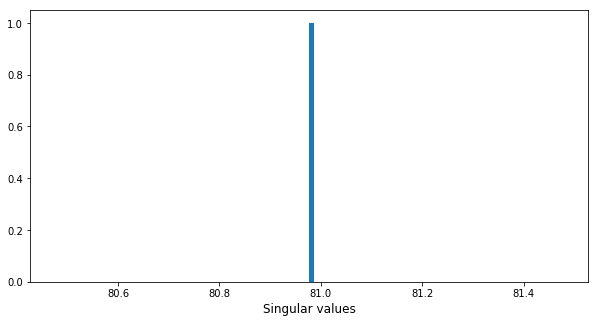

In [39]:
corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]
numpy_matrix = gensim.matutils.corpus2dense(corpus, num_terms=51556)
s = np.linalg.svd(numpy_matrix, full_matrices=False, compute_uv=False)
plt.figure(figsize=(10,5))
plt.hist(s[0], bins=100)
plt.xlabel('Singular values', fontsize=12)
plt.show()

In [40]:
plt.figure(figsize=(10,5))
plt.plot(range(0,101,5), nbr, '*-')
plt.xlabel('Threshold of singular values', fontsize=12)
plt.ylabel('Number of topics', fontsize=12)

NameError: name 'nbr' is not defined

<Figure size 720x360 with 0 Axes>